In [1]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

Using TensorFlow backend.


In [2]:
df_final = pd.read_csv('../data/df_vote_final.csv')
df_final.tail()

,Unnamed: 0,level_0,index,Unnamed: 0.1,action_date,action_time,chamber,congress,legis_num,majority,...,vote,vote_desc,vote_question,vote_result,vote_type,sponsor,sponsor_id,sponsor_party,sponsor_state,sponsor_uri
5103690,5103690,413,2835512,2835512,19-Mar-2015,12:08 PM,U.S. House of Representatives,114,S J RES 8,R,...,Yea,Providing for congressional disapproval under ...,On Passage,Passed,YEA-AND-NAY,Lamar Alexander,A000360,R,TN,https://api.propublica.org/congress/v1/members...
5103691,5103691,414,2835513,2835513,19-Mar-2015,12:08 PM,U.S. House of Representatives,114,S J RES 8,R,...,Yea,Providing for congressional disapproval under ...,On Passage,Passed,YEA-AND-NAY,Lamar Alexander,A000360,R,TN,https://api.propublica.org/congress/v1/members...
5103692,5103692,415,2835514,2835514,19-Mar-2015,12:08 PM,U.S. House of Representatives,114,S J RES 8,R,...,Yea,Providing for congressional disapproval under ...,On Passage,Passed,YEA-AND-NAY,Lamar Alexander,A000360,R,TN,https://api.propublica.org/congress/v1/members...
5103693,5103693,416,2835515,2835515,19-Mar-2015,12:08 PM,U.S. House of Representatives,114,S J RES 8,R,...,Yea,Providing for congressional disapproval under ...,On Passage,Passed,YEA-AND-NAY,Lamar Alexander,A000360,R,TN,https://api.propublica.org/congress/v1/members...
5103694,5103694,417,2835516,2835516,19-Mar-2015,12:08 PM,U.S. House of Representatives,114,S J RES 8,R,...,Yea,Providing for congressional disapproval under ...,On Passage,Passed,YEA-AND-NAY,Lamar Alexander,A000360,R,TN,https://api.propublica.org/congress/v1/members...


In [3]:
df_final.columns

Index(['Unnamed: 0', 'level_0', 'index', 'Unnamed: 0.1', 'action_date',
       'action_time', 'chamber', 'congress', 'legis_num', 'majority', 'name',
       'party', 'role', 'rollcall_num', 'session', 'state', 'vote',
       'vote_desc', 'vote_question', 'vote_result', 'vote_type', 'sponsor',
       'sponsor_id', 'sponsor_party', 'sponsor_state', 'sponsor_uri'],
      dtype='object')

In [19]:
dataset = df_final[['name', 'party', 'legis_num', 'vote']]
dataset['bill_id'] = dataset.legis_num.astype('category').cat.codes.values
dataset['name_id'] = dataset.name.astype('category').cat.codes.values
dataset['vote'] = dataset.vote.astype('category').cat.codes.values

# dataset.drop(columns=['name', 'legis_num'], inplace=True)
dataset = dataset.sample(frac=0.2, replace=True)
dataset.reset_index(inplace=True)
dataset.tail()

,index,name,party,legis_num,vote,bill_id,name_id
1020734,4225153,Larsen (WA),D,H RES 447,1,3279,607
1020735,4143410,McKeon,R,H RES 382,1,3216,696
1020736,3126185,Garrett (NJ),R,H R 5501,0,2209,377
1020737,3950389,Saxton,R,H RES 228,1,3064,916
1020738,131709,Hinchey,D,H CON RES 397,1,194,475


In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2)

print()
print('train',train.shape)
print('test', test.shape)
train.head()


train (816591, 7)
test (204148, 7)


,index,name,party,legis_num,vote,bill_id,name_id
184778,876532,LoBiondo,R,H R 2016,0,811,629
152229,1159211,Sarbanes,D,H R 2397,1,959,914
263190,4804565,Hunter,R,H RES 951,1,3747,502
513166,1390547,Watson,D,H R 2641,0,1059,1069
560802,1038444,Smith (NE),R,H R 2219,1,889,966


In [78]:
n_users, n_bill = len(dataset.name_id.unique()) + 1, len(dataset.bill_id.unique()) + 1
n_latent_factors = 50

print('number of legsitlators:', n_users)
print('number of bills', n_bill)
print('TRAIN #number legitlators:', len(train.name_id.unique()), '#bills:', len(train.bill_id.unique()),)
print('TEST #number legitlators:', len(test.name_id.unique()), '#bills:', len(test.bill_id.unique()),)
print('TRAIN', train.shape)
print('TEST', test.shape)

number of legsitlators: 1118
number of bills 4062
TRAIN #number legitlators: 1116 #bills: 4061
TEST #number legitlators: 1116 #bills: 4061
TRAIN (816591, 7)
TEST (204148, 7)


In [73]:
def plot_history(history):
    print(history.history)
    df = pd.DataFrame(history.history)
    print(df.describe())
    df.plot(xticks=range(epochs))
#     print(history.history.keys())


In [74]:
! cd /home/sonic/.keras/datasets/glove.6B.100d.txt

/bin/sh: line 0: cd: /home/sonic/.keras/datasets/glove.6B.100d.txt: Not a directory


In [75]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('/home/sonic/.keras/datasets/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))


Loaded 400000 word vectors.


# Matrix Factorisation 



In [79]:
def get_matrix_factorisation():
    movie_input = keras.layers.Input(shape=[1],name='Item')
    movie_embedding = keras.layers.Embedding(n_bill, n_latent_factors, name='Movie-Embedding')(movie_input)
    movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

    user_input = keras.layers.Input(shape=[1],name='User')
    user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users, 
                                                                                n_latent_factors,
                                                                                name='User-Embedding')(user_input))

    prod = keras.layers.dot([movie_vec, user_vec], axes=1, name='DotProduct')
    model = keras.Model([user_input, movie_input], prod)
    model.compile('adam', 'mean_squared_error')
#     SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))
    return model

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 50)        203100      Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 50)        55900       User[0][0]                       
__________________________________________________________________________________________________
FlattenMov

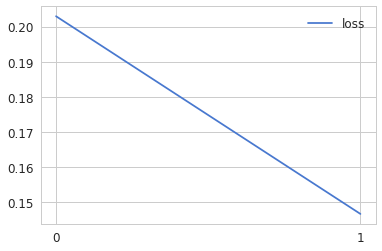

In [80]:
epochs=2

model = get_matrix_factorisation()
model.summary()

history = model.fit([train.name_id, train.bill_id], 
                    train.vote, epochs=epochs, verbose=1)

plot_history(history)

In [25]:
y_hat = np.round(model.predict([test.name_id, test.bill_id]), 0)
y_true = test.vote

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_hat)

0.23381567

In [107]:
myList = {0:0, 1:1, 2:2, 3:3}
print(len(myList))

4


In [61]:
movie_embedding_learnt = model.get_layer(name='Movie-Embedding').get_weights()[0]
print(movie_embedding_learnt.shape)
user_embedding_learnt = model.get_layer(name='User-Embedding').get_weights()[0]
print(user_embedding_learnt.shape)
pd.DataFrame(user_embedding_learnt).()

(4062, 50)
(1118, 50)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1113,0.157712,0.185881,0.020047,-0.002946,-0.213846,0.162715,0.122584,0.385135,-0.197692,0.042911,...,-0.215660,0.072618,0.217461,0.015580,0.093211,0.163698,-0.163688,0.014410,-0.028261,-0.039211
1114,0.183996,0.332284,-0.287987,-0.083383,-0.130846,0.090426,0.011366,0.358167,-0.277059,0.074297,...,-0.228045,-0.039139,0.129298,-0.048089,0.188203,-0.395720,0.198688,0.093234,0.072881,-0.000405
1115,0.034999,0.206546,-0.264730,-0.172136,0.191605,0.040131,-0.001836,0.016029,-0.195318,-0.118909,...,-0.264629,-0.146007,0.194687,-0.065532,-0.021292,-0.351518,-0.022455,-0.054781,0.007053,-0.163081
1116,0.038144,0.011308,-0.111976,0.103848,-0.155751,0.121748,-0.255079,0.224177,-0.105090,0.261771,...,-0.019942,-0.088453,0.088605,-0.028666,0.278087,-0.273313,-0.089283,0.153839,-0.090218,0.121413
1117,0.277020,0.215834,-0.283239,-0.136778,-0.274062,0.204426,0.159202,0.013470,-0.235101,0.077489,...,-0.256626,-0.364881,0.251195,-0.176516,0.253253,-0.273138,0.113300,-0.032945,-0.063011,-0.332452


In [103]:
x = pd.DataFrame(movie_embedding_learnt)
# print(x.tail())
# y = train.groupby('name_id')
y = []
# for name_id in train.name_id.unique():
#     y.append( dataset[dataset.name_id == name_id].iloc[0]['party'])
# y = dataset.groupby(['name']).first().reset_index()
for name, group in dataset.groupby(['name_id']):
    print(name, group.iloc[0]['name'])
    y.append( dataset[dataset.name_id == group.iloc[0]['name_id']].iloc[0]['party'])
print(y)

0 Abercrombie
1 Abraham
2 Ackerman
3 Adams
4 Aderholt
5 Adler (NJ)
6 Aguilar
7 Akin
8 Alexander
9 Allen
10 Altmire
11 Amash
12 Amodei
13 Andrews
14 Archer
15 Arcuri
16 Armey
17 Arrington
18 Ashford
19 Austria
20 Babin
21 Baca
22 Bachmann
23 Bachus
24 Bacon
25 Baird
26 Baker
27 Baldacci
28 Baldwin
29 Ballance
30 Ballenger
31 Banks (IN)
32 Barber
33 Barcia
34 Barletta
35 Barr
36 Barragán
37 Barrett
38 Barrett (NE)
39 Barrett (SC)
40 Barrett (WI)
41 Barrow
42 Barrow (GA)
43 Bartlett
44 Bartlett (MD)
45 Barton
46 Barton (TX)
47 Bass
48 Bass (CA)
49 Bass (NH)
50 Bateman
51 Bean
52 Beatty
53 Beauprez
54 Becerra
55 Bell
56 Benishek
57 Bentivolio
58 Bentsen
59 Bera
60 Bera (CA)
61 Bereuter
62 Berg
63 Bergman
64 Berkley
65 Berman
66 Berry
67 Beutler
68 Beyer
69 Biggert
70 Biggs
71 Bilbray
72 Bilirakis
73 Bishop
74 Bishop (GA)
75 Bishop (MI)
76 Bishop (NY)
77 Bishop (UT)
78 Black
79 Blackburn
80 Blagojevich
81 Bliley
82 Blum
83 Blumenauer
84 Blunt
85 Blunt Rochester
86 Boccieri
87 Boehlert
88 Bo

727 Minnick
728 Mitchell
729 Moakley
730 Mollohan
731 Moolenaar
732 Mooney (WV)
733 Moore
734 Moore (KS)
735 Moore (WI)
736 Moran
737 Moran (KS)
738 Moran (VA)
739 Morella
740 Moulton
741 Mullin
742 Mulvaney
743 Murphy
744 Murphy (CT)
745 Murphy (FL)
746 Murphy (NY)
747 Murphy (PA)
748 Murphy, Patrick
749 Murphy, Tim
750 Murtha
751 Musgrave
752 Myrick
753 Nadler
754 Nadler (NY)
755 Napolitano
756 Neal
757 Neal (MA)
758 Negrete McLeod
759 Nethercutt
760 Neugebauer
761 Newhouse
762 Ney
763 Noem
764 Nolan
765 Norcross
766 Norman
767 Northup
768 Norton
769 Norwood
770 Nugent
771 Nunes
772 Nunnelee
773 Nussle
774 Nye
775 O'Halleran
776 O'Rourke
777 Oberstar
778 Obey
779 Olson
780 Olver
781 Ortiz
782 Osborne
783 Ose
784 Otter
785 Owens
786 Oxley
787 Packard
788 Palazzo
789 Pallone
790 Palmer
791 Panetta
792 Pascrell
793 Pastor
794 Pastor (AZ)
795 Paul
796 Paulsen
797 Payne
798 Pearce
799 Pease
800 Pelosi
801 Pence
802 Perlmutter
803 Perriello
804 Perry
805 Peters
806 Peters (CA)
807 Peters (

['D' 'I' 'R']
[0 2 0 ... 2 2 1]


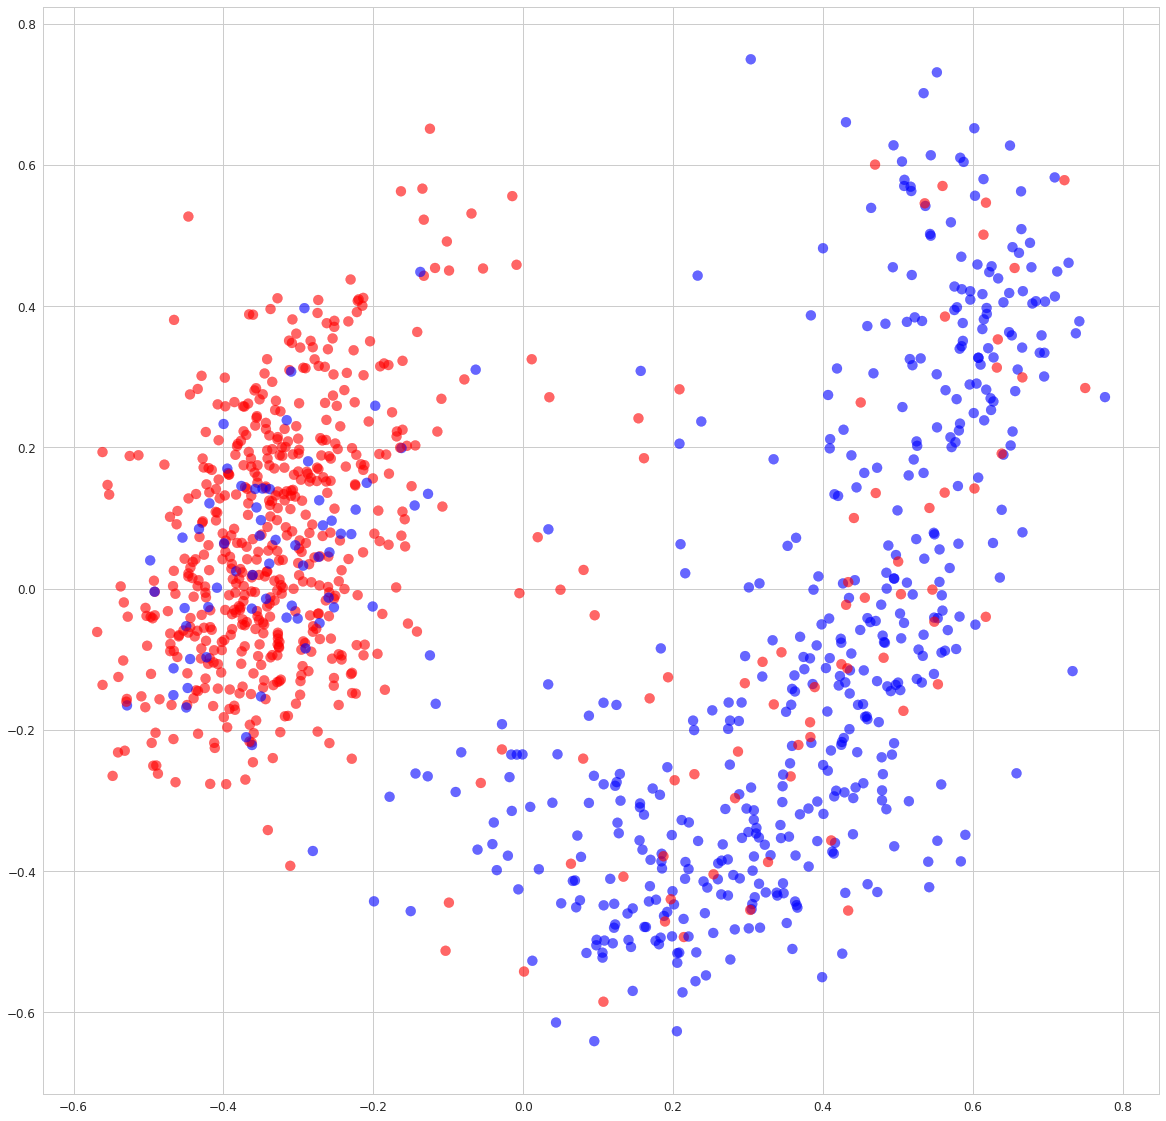

In [104]:
# y = train.groupby('name_id')
# y = dataset.groupby('name_id').first().reset_index()

# y = y['party'].values
# print(y.shape)
y = np.append(y, ['I'])

from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

le = preprocessing.LabelEncoder()
le.fit(y)
print(le.classes_)
y = le.transform(y)
print(y)

colors = ['blue', 'red']

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(user_embedding_learnt)

plt.figure(1, figsize=(20, 20),)
# plt.scatter(x_pca[:, 0], x_pca[:, 1], s=100, alpha=0.6)
plt.scatter(x_pca[:, 0], x_pca[:, 1], s=100, c=y, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.6)


# Non-negative Matrix factorisation (NNMF) in Keras


In [ ]:
from keras.constraints import non_neg

def get_NNMF():
    movie_input = keras.layers.Input(shape=[1],name='Item')
    movie_embedding = keras.layers.Embedding(n_bill + 1, n_latent_factors, 
                                             name='NonNegMovie-Embedding', embeddings_constraint=non_neg())(movie_input)
    movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

    user_input = keras.layers.Input(shape=[1],name='User')
    user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,
                                                                                name='NonNegUser-Embedding',embeddings_constraint=non_neg())(user_input))

    prod = keras.layers.dot([movie_vec, user_vec], axes=1,name='DotProduct')
    model = keras.Model([user_input, movie_input], prod)
    model.compile('adam', 'mean_squared_error')
    return model

model = get_NNMF()
print(model.summary())

history_nonneg = model.fit([train.name_id, train.bill_id], 
                           train.vote, epochs=epochs, verbose=1)

plot_history(history_nonneg)

movie_embedding_learnt = model.get_layer(name='NonNegMovie-Embedding').get_weights()[0]
print(movie_embedding_learnt.shape)
# pd.DataFrame(movie_embedding_learnt).describe()

# Neural networks for recommendation

In [ ]:
n_latent_factors_user = 5
n_latent_factors_movie = 50

def get_nueral_net():
    movie_input = keras.layers.Input(shape=[1],name='Item')
    movie_embedding = keras.layers.Embedding(n_bill + 1, n_latent_factors_movie, name='Movie-Embedding')(movie_input)
    movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)
    movie_vec = keras.layers.Dropout(0.2)(movie_vec)


    user_input = keras.layers.Input(shape=[1],name='User')
    user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding')(user_input))
    user_vec = keras.layers.Dropout(0.2)(user_vec)


    concat = keras.layers.concatenate([movie_vec, user_vec], name='Concat')
    concat_dropout = keras.layers.Dropout(0.2)(concat)
    dense = keras.layers.Dense(200,name='FullyConnected')(concat)
    dropout_1 = keras.layers.Dropout(0.2,name='Dropout')(dense)
    dense_2 = keras.layers.Dense(100,name='FullyConnected-1')(concat)
    dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)
    dense_3 = keras.layers.Dense(50,name='FullyConnected-2')(dense_2)
    dropout_3 = keras.layers.Dropout(0.2,name='Dropout')(dense_3)
    dense_4 = keras.layers.Dense(20,name='FullyConnected-3', activation='relu')(dense_3)


    result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
    adam = Adam(lr=0.005)
    model = keras.Model([user_input, movie_input], result)
    model.compile(optimizer=adam,loss= 'mean_absolute_error')
#     SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))
    return model

In [ ]:

model = get_nueral_net()
model.summary()
history = model.fit([train.name_id, train.bill_id], train.vote, 
                    epochs=epochs, verbose=1)
plot_history(history)

In [ ]:
y_hat_2 = np.round(model.predict([test.name_id, test.bill_id]),0)
print(mean_absolute_error(y_true, y_hat_2))

print(mean_absolute_error(y_true, model.predict([test.name_id, test.bill_id])))

In [ ]:
movie_embedding_learnt = model.get_layer(name='Movie-Embedding').get_weights()[0]
print(movie_embedding_learnt.shape)